In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data from github

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/refs/heads/main/glass.csv',names=['Id_Number','RI_refractive index','Na_Sodium','Mg_Magnesium','Al_Aluminum','Si_Silicon','K_Potassium','Ca_Calcium','Ba_ Barium','Fe_Iron','Type_of_glass'],header=None)
df

,Id_Number,RI_refractive index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_ Barium,Fe_Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


dataset does not contain column names so adding columns as per data given

In [3]:
df.shape

(214, 11)

dataset contains 10 input variables and 1 output variable and contains 214 rows of data

In [4]:
Glass_type=[]
for i in df['Type_of_glass']:
    if i>=5:
        Glass_type.append(1)
    else:
        Glass_type.append(0)
        

In [5]:
df['Class']=np.array(Glass_type)
df.head()

,Id_Number,RI_refractive index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_ Barium,Fe_Iron,Type_of_glass,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


converting type of glass into 2 category . 0 for window glass [1-4 classes] and 1 for non_window glass [5-7 classes]

In [6]:
df.drop('Type_of_glass',axis=1,inplace=True)
df.tail()

,Id_Number,RI_refractive index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_ Barium,Fe_Iron,Class
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,1
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,1
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,1
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,1
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,1


dropping type of class from the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_Number            214 non-null    int64  
 1   RI_refractive index  214 non-null    float64
 2   Na_Sodium            214 non-null    float64
 3   Mg_Magnesium         214 non-null    float64
 4   Al_Aluminum          214 non-null    float64
 5   Si_Silicon           214 non-null    float64
 6   K_Potassium          214 non-null    float64
 7   Ca_Calcium           214 non-null    float64
 8   Ba_ Barium           214 non-null    float64
 9   Fe_Iron              214 non-null    float64
 10  Class                214 non-null    int32  
dtypes: float64(9), int32(1), int64(1)
memory usage: 17.7 KB


there are only 2 types of datatype int and float.
and there is no null values.

In [8]:
df.isnull().sum()

Id_Number              0
RI_refractive index    0
Na_Sodium              0
Mg_Magnesium           0
Al_Aluminum            0
Si_Silicon             0
K_Potassium            0
Ca_Calcium             0
Ba_ Barium             0
Fe_Iron                0
Class                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

there is no duplicated data in the dataset

In [10]:
df['Class'].value_counts()

Class
0    163
1     51
Name: count, dtype: int64

dataset contains more windows glass than non-window glass

<Axes: xlabel='Class', ylabel='count'>

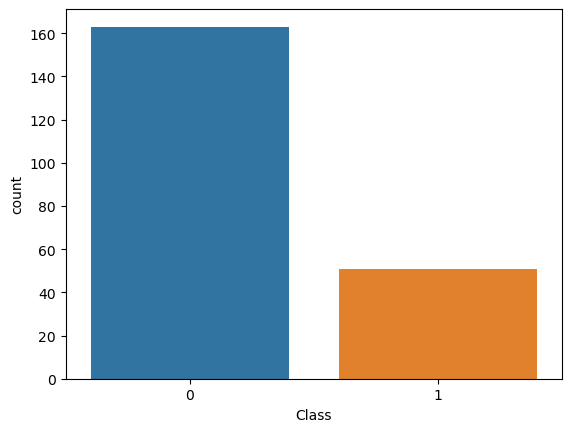

In [11]:
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts())

In [12]:
df.describe()

,Id_Number,RI_refractive index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_ Barium,Fe_Iron,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


count for all columns is same(214).

id number is having more standard deviation any how we are going to make id number as index columns.so it will not affect our data.

mean is slightly greater than median in (Refractive_index,sodium,aluminium,calcium,barium,iron).

median is greater than mean in (magnesium,silicon,pottassium).

there is a chance of outliers present in pottassium calcium (big difference between 75th percentile and max).

we can also observe minimum,25th percentile,50th,75th and max values for all the columns.



In [13]:
df=df.set_index('Id_Number')
df.head()

,RI_refractive index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_ Barium,Fe_Iron,Class
Id_Number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


setting id number as index for our dataset.

# Data visualization

outlier identification

RI_refractive index       Axes(0.125,0.53;0.110714x0.35)
Na_Sodium              Axes(0.257857,0.53;0.110714x0.35)
Mg_Magnesium           Axes(0.390714,0.53;0.110714x0.35)
Al_Aluminum            Axes(0.523571,0.53;0.110714x0.35)
Si_Silicon             Axes(0.656429,0.53;0.110714x0.35)
K_Potassium            Axes(0.789286,0.53;0.110714x0.35)
Ca_Calcium                Axes(0.125,0.11;0.110714x0.35)
Ba_ Barium             Axes(0.257857,0.11;0.110714x0.35)
Fe_Iron                Axes(0.390714,0.11;0.110714x0.35)
Class                  Axes(0.523571,0.11;0.110714x0.35)
dtype: object

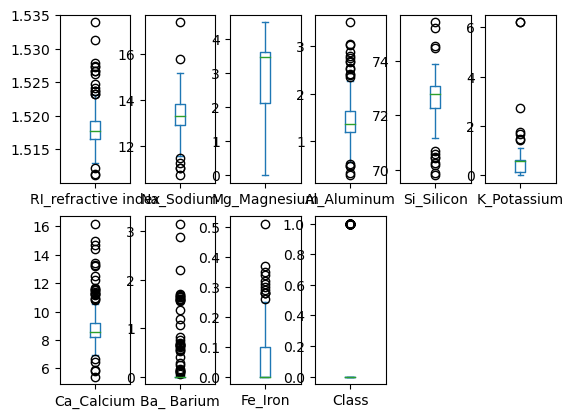

In [14]:
df.plot(kind='box',subplots=True,layout=(2,6))

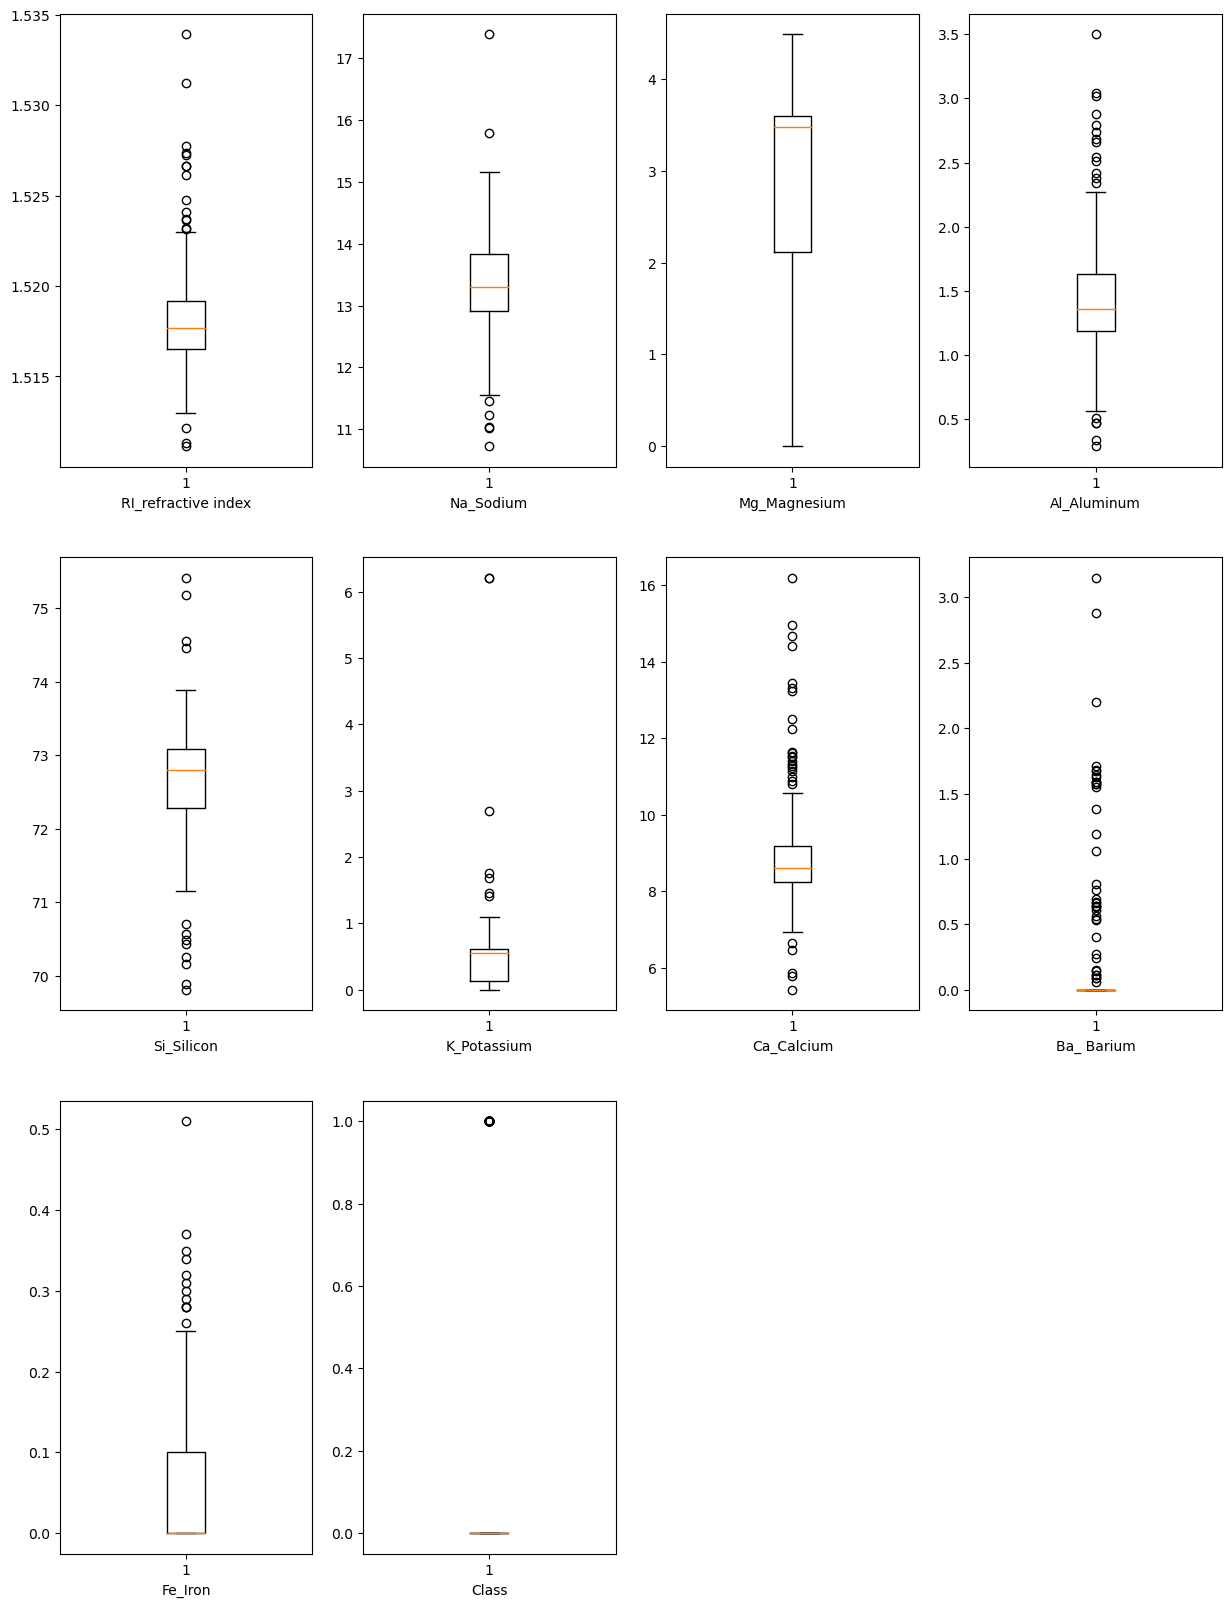

In [15]:
plt.figure(figsize=(15,20))
a=1
for i in df:
    if a<=15:
        plt.subplot(3,4,a)
        plt.boxplot(df[i])
        plt.xlabel(i)
    a=a+1
plt.show()

outliers are present in most of the columns.we need to remove that using z score.

In [16]:
# z score calculations

z=np.abs(zscore(df))
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [17]:
# need to remove z score

df=df[(z<3).all(axis=1)]

In [18]:
df.shape

(194, 10)

after removing outliers dataset contain 194 rows.

In [19]:
df.corr()

,RI_refractive index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_ Barium,Fe_Iron,Class
RI_refractive index,1.000000,0.050760,0.048147,-0.522197,-0.609011,-0.368238,0.690650,-0.193013,-0.020046,-0.060410
Na_Sodium,0.050760,1.000000,-0.487729,0.253127,-0.234718,-0.612183,0.019987,0.532000,-0.209838,0.463723
Mg_Magnesium,0.048147,-0.487729,1.000000,-0.593457,-0.377464,0.482622,-0.455582,-0.586581,0.134065,-0.840407
Al_Aluminum,-0.522197,0.253127,-0.593457,1.000000,0.335262,0.005827,-0.213304,0.532061,-0.117764,0.600752
Si_Silicon,-0.609011,-0.234718,-0.377464,0.335262,1.000000,0.072579,-0.165712,0.155017,0.023279,0.282746
K_Potassium,-0.368238,-0.612183,0.482622,0.005827,0.072579,1.000000,-0.500579,-0.253790,0.099394,-0.396495
Ca_Calcium,0.690650,0.019987,-0.455582,-0.213304,-0.165712,-0.500579,1.000000,-0.167843,-0.011635,0.288044
Ba_ Barium,-0.193013,0.532000,-0.586581,0.532061,0.155017,-0.253790,-0.167843,1.000000,-0.119955,0.618309
Fe_Iron,-0.020046,-0.209838,0.134065,-0.117764,0.023279,0.099394,-0.011635,-0.119955,1.000000,-0.207574
Class,-0.060410,0.463723,-0.840407,0.600752,0.282746,-0.396495,0.288044,0.618309,-0.207574,1.000000


<Axes: >

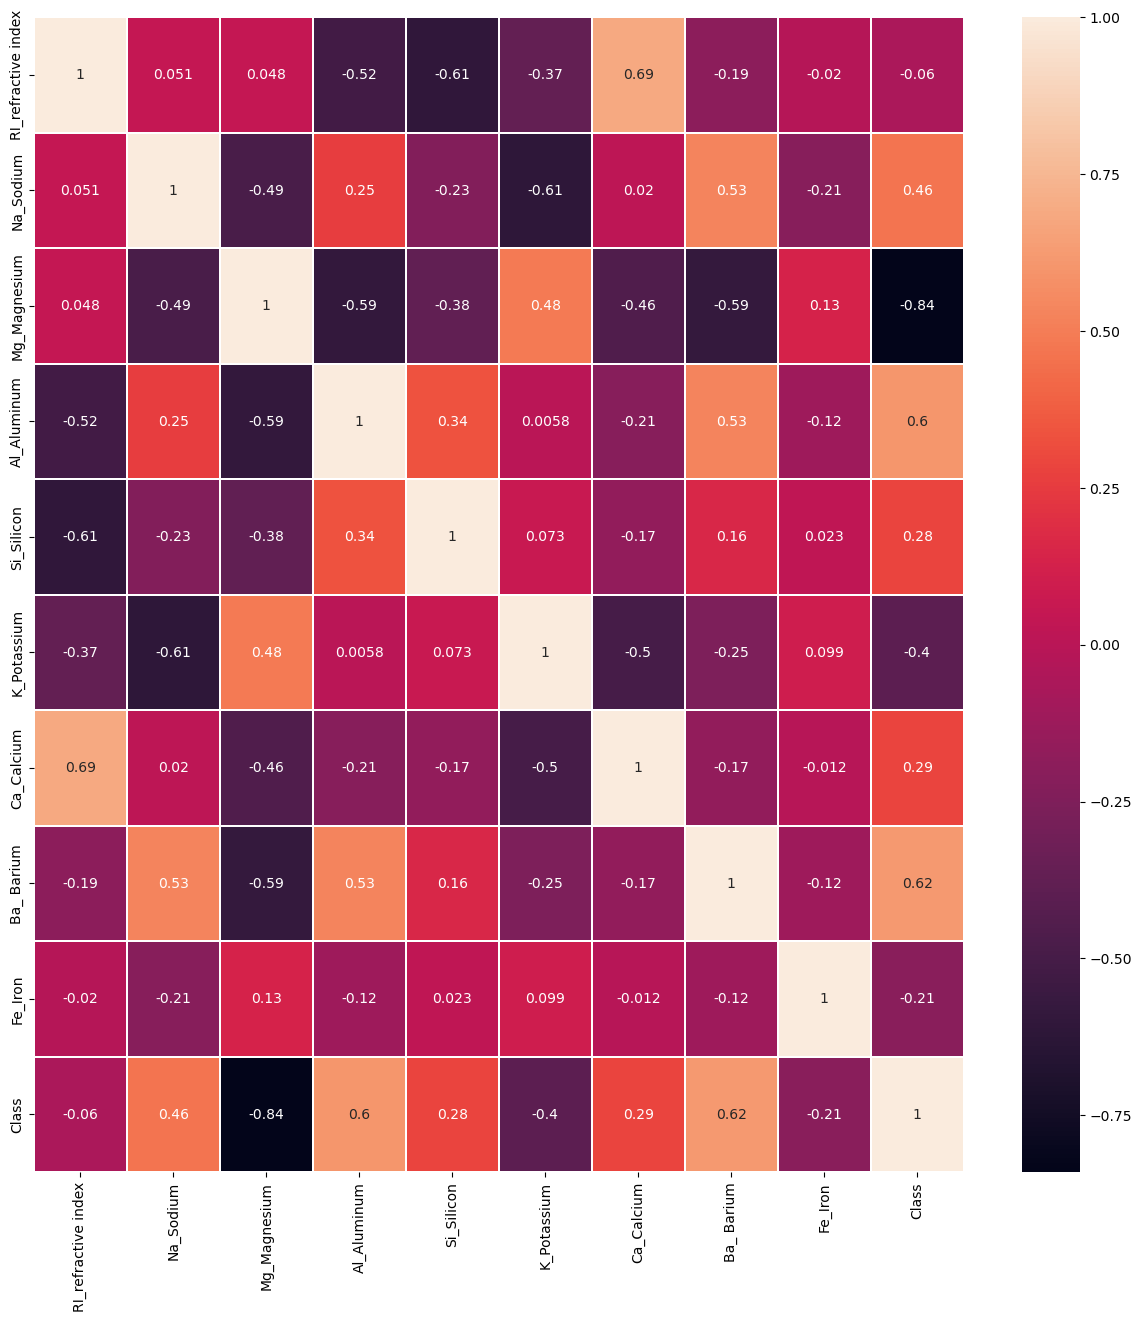

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.3)

class is moderately correlated with barium,aluminium,sodium.

highly correlated with magnesium. and others are less correlated with class.

RI,iron,magnesium and potassium are negatively correlated with class (output).

refractive index is less correlated with output variable(Class).

so removing that column

In [21]:
df.drop('RI_refractive index',axis=1,inplace=True)

In [22]:
df.head()

,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_ Barium,Fe_Iron,Class
Id_Number,,,,,,,,,
1,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
2,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
3,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
4,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
5,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


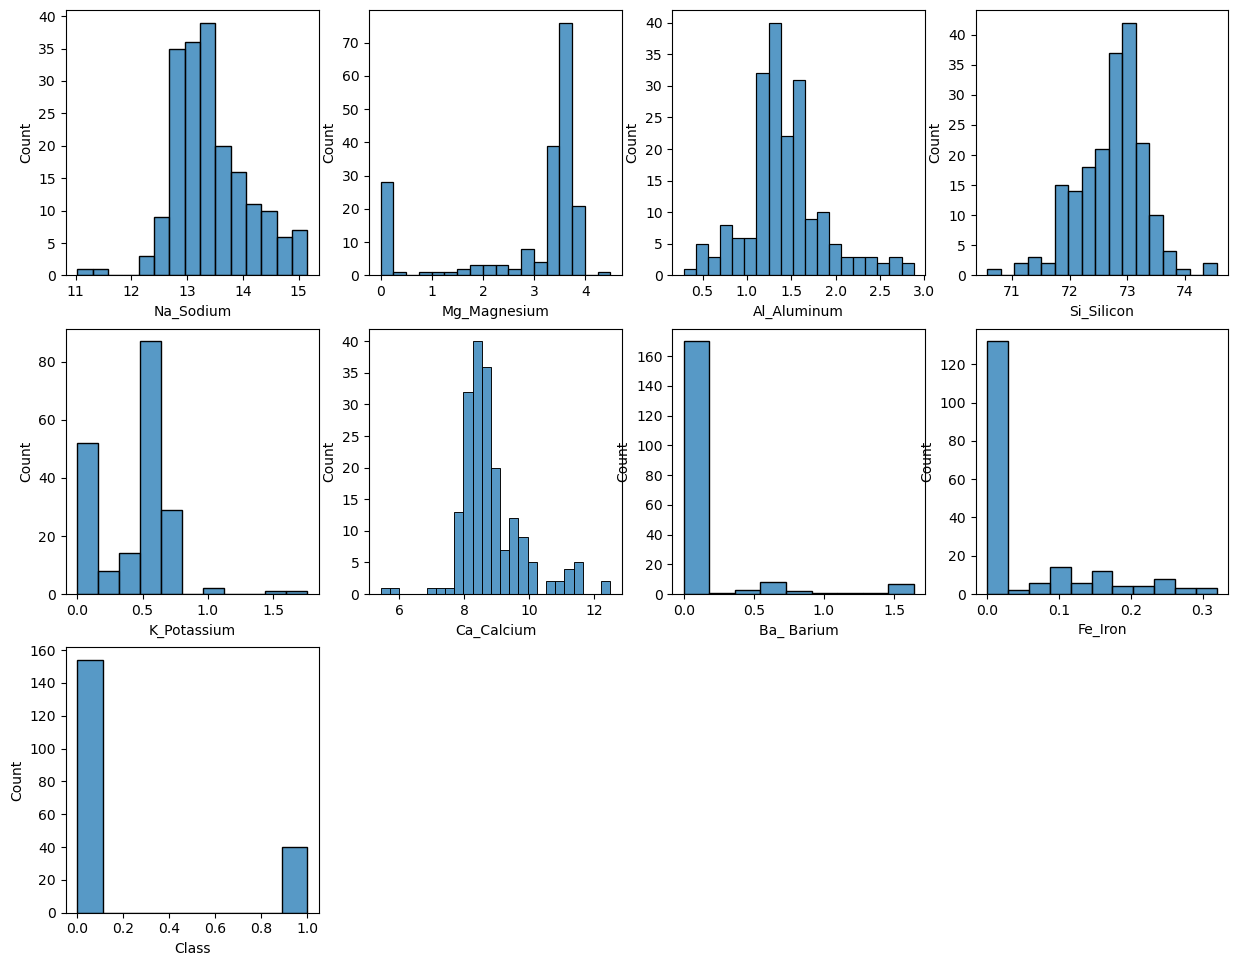

In [23]:
plt.figure(figsize=(15,20))
a=1
for i in df:
    if a<=13:
        plt.subplot(5,4,a)
        sns.histplot(df[i])
        plt.xlabel(i)
    a=a+1
plt.show()

In [24]:
df.skew()

Na_Sodium       0.371482
Mg_Magnesium   -1.528849
Al_Aluminum     0.658259
Si_Silicon     -0.425450
K_Potassium     0.303175
Ca_Calcium      1.077962
Ba_ Barium      3.188587
Fe_Iron         1.486479
Class           1.463837
dtype: float64

In [25]:
df['Al_Aluminum']=np.sqrt(df['Al_Aluminum'])

In [26]:
df['Ca_Calcium']=np.log(df['Ca_Calcium'])

In [27]:
df['Mg_Magnesium']=np.exp(df['Mg_Magnesium'])

used differet different method to reduce the skewness

In [28]:
df.skew()

Na_Sodium       0.371482
Mg_Magnesium   -0.385514
Al_Aluminum    -0.094727
Si_Silicon     -0.425450
K_Potassium     0.303175
Ca_Calcium      0.336556
Ba_ Barium      3.188587
Fe_Iron         1.486479
Class           1.463837
dtype: float64

removing barium and iron columns ( it contains very less values. that will not help in calculations.)

In [29]:
df.drop('Ba_ Barium',axis=1,inplace=True)
df.drop('Fe_Iron',axis=1,inplace=True)

In [30]:
df.head()

,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Class
Id_Number,,,,,,,
1,13.64,89.121446,1.048809,71.78,0.06,2.169054,0
2,13.89,36.598234,1.166190,72.73,0.48,2.057963,0
3,13.53,34.813317,1.240967,72.99,0.39,2.051556,0
4,13.21,40.044847,1.135782,72.61,0.57,2.106570,0
5,13.27,37.337568,1.113553,73.08,0.55,2.088153,0


In [31]:
df.skew()

Na_Sodium       0.371482
Mg_Magnesium   -0.385514
Al_Aluminum    -0.094727
Si_Silicon     -0.425450
K_Potassium     0.303175
Ca_Calcium      0.336556
Class           1.463837
dtype: float64

In [32]:
df.shape

(194, 7)

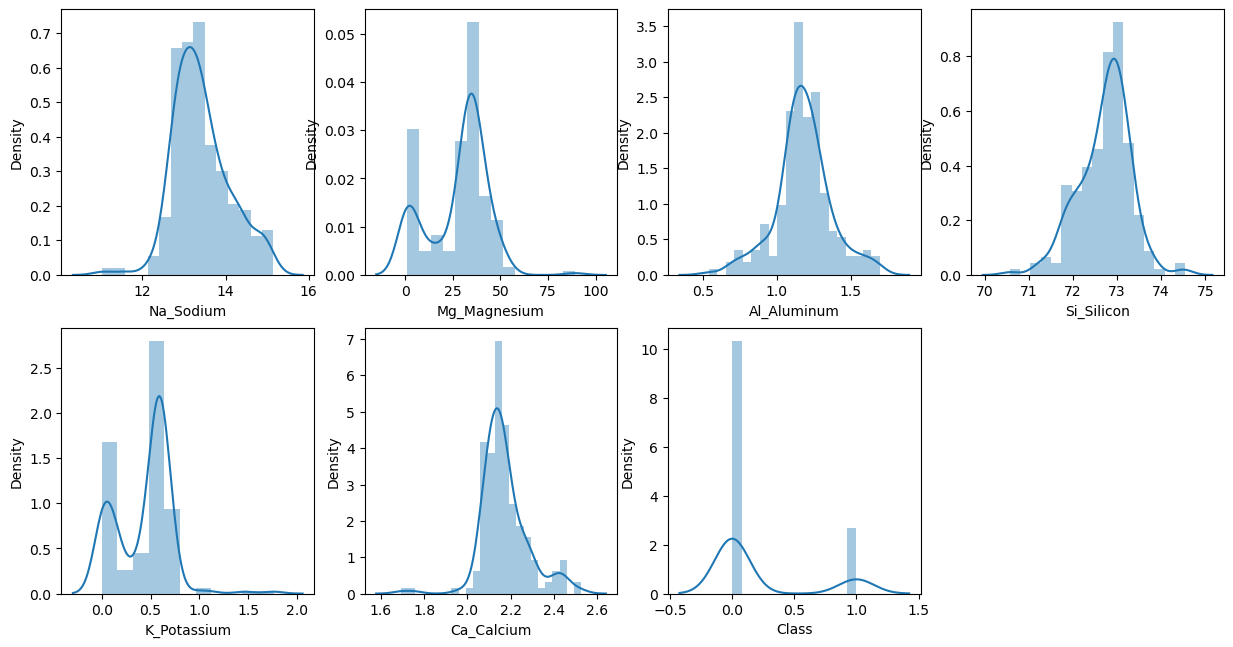

In [33]:
plt.figure(figsize=(15,20))
a=1
for i in df:
    if a<=13:
        plt.subplot(5,4,a)
        sns.distplot(df[i])
        plt.xlabel(i)
    a=a+1
plt.show()

In [34]:
df.head()

,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Class
Id_Number,,,,,,,
1,13.64,89.121446,1.048809,71.78,0.06,2.169054,0
2,13.89,36.598234,1.166190,72.73,0.48,2.057963,0
3,13.53,34.813317,1.240967,72.99,0.39,2.051556,0
4,13.21,40.044847,1.135782,72.61,0.57,2.106570,0
5,13.27,37.337568,1.113553,73.08,0.55,2.088153,0


In [35]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]               # dividing the data into x and y

In [36]:
x.head(1)

,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium
Id_Number,,,,,,
1,13.64,89.121446,1.048809,71.78,0.06,2.169054


In [37]:
print(x.shape)
print(y.shape)

(194, 6)
(194,)


In [38]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()             # standardizing x data

In [39]:
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x

,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium
0,0.332127,3.945517,-0.689377,-1.612464,-1.319609,-0.023335
1,0.704398,0.555527,-0.062897,0.016082,0.172091,-1.048197
2,0.168328,0.440324,0.336197,0.461790,-0.147559,-1.107296
3,-0.308179,0.777981,-0.225192,-0.189629,0.491741,-0.599771
4,-0.218834,0.603245,-0.343830,0.616073,0.420708,-0.769673
...,...,...,...,...,...,...
189,1.419158,-1.742079,2.547511,0.221793,-1.532708,0.686662
190,1.076668,-1.742079,2.770398,-0.189629,-1.248575,0.419240
191,2.238153,-1.742079,1.241939,0.581788,-1.532708,-0.399935
192,1.404267,-1.742079,1.298478,1.198921,-1.532708,-0.356108


In [40]:
df['Class'].value_counts()

Class
0    154
1     40
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

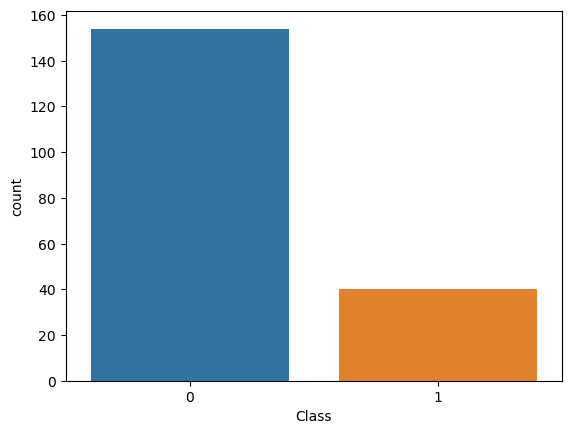

In [41]:
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts())

data is not balanced 

In [42]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x,y) # balancing the data

In [43]:
y1.value_counts()

Class
0    154
1    154
Name: count, dtype: int64

# Model Building

# Naive-Bayes Classifier

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=38)

In [46]:
gab=GaussianNB()
gab.fit(x_train,y_train)

GaussianNB()

In [47]:
pred=gab.predict(x_test)

In [48]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[43  1]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.94      0.96        49

    accuracy                           0.96        93
   macro avg       0.96      0.96      0.96        93
weighted avg       0.96      0.96      0.96        93



In [49]:
from sklearn.model_selection import cross_val_score as cv

In [50]:
val_score=cv(gab,x1,y1)

In [51]:
ac=accuracy_score(y_test,pred)*100
print('accuracy score is:',ac)
cvs=val_score.mean()*100
print('cross_value score is :',cvs)
val=ac-cvs
print('error:',val)

accuracy score is: 95.6989247311828
cross_value score is : 96.737176097303
error: -1.0382513661202069


# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [53]:
lr.fit(x_train,y_train)

LogisticRegression()

In [54]:
pred1=lr.predict(x_test)

In [55]:
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

[[43  1]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        44
           1       0.98      0.88      0.92        49

    accuracy                           0.92        93
   macro avg       0.93      0.93      0.92        93
weighted avg       0.93      0.92      0.92        93



In [56]:
val_score1=cv(lr,x1,y1)

In [57]:
ac1=accuracy_score(y_test,pred1)*100
print('accuracy score is:',ac1)
cvs1=val_score1.mean()*100
print('cross_value score is :',cvs1)
val1=ac1-cvs1
print('error:',val)

accuracy score is: 92.47311827956989
cross_value score is : 95.11369645690111
error: -1.0382513661202069


# DecisionTree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [59]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
pred2=dtc.predict(x_test)

In [61]:
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

[[44  0]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       1.00      0.92      0.96        49

    accuracy                           0.96        93
   macro avg       0.96      0.96      0.96        93
weighted avg       0.96      0.96      0.96        93



In [62]:
val_score2=cv(dtc,x1,y1)

In [63]:
ac2=accuracy_score(y_test,pred2)*100
print('accuracy score is:',ac2)
cvs2=val_score2.mean()*100
print('cross_value score is:',cvs2)
val2=ac2-cvs2
print('error:',val2)

accuracy score is: 95.6989247311828
cross_value score is: 96.10787942887362
error: -0.4089546976908167


# Extra Tree Classifier

In [64]:
from sklearn.tree import ExtraTreeClassifier
etc=ExtraTreeClassifier()

In [65]:
etc.fit(x_train,y_train)

ExtraTreeClassifier()

In [66]:
pred3=etc.predict(x_test)

In [67]:
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

[[43  1]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        44
           1       0.98      0.84      0.90        49

    accuracy                           0.90        93
   macro avg       0.91      0.91      0.90        93
weighted avg       0.91      0.90      0.90        93



In [68]:
val_score3=cv(etc,x1,y1)

In [69]:
ac3=accuracy_score(y_test,pred3)*100
print('accuracy_score is:',ac3)
cvs3=val_score3.mean()*100
print('cross_value score is:',cvs3)
val3=ac3-cvs3
print('error:',val3)

accuracy_score is: 90.32258064516128
cross_value score is: 93.15705975674247
error: -2.8344791115811887


# KNeighbors Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [71]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
pred4=knn.predict(x_test)

In [73]:
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

[[44  0]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.96      0.98        49

    accuracy                           0.98        93
   macro avg       0.98      0.98      0.98        93
weighted avg       0.98      0.98      0.98        93



In [74]:
val_score4=cv(knn,x1,y1)

In [75]:
ac4=accuracy_score(y_test,pred4)*100
print('accuracy_score is:',ac4)
cvs4=val_score4.mean()*100
print('cross_valuescore:',cvs4)
val4=ac4-cvs4
print('error:',val4)

accuracy_score is: 97.84946236559139
cross_valuescore: 97.0597567424643
error: 0.7897056231270909


# Support Vector Classifier

In [76]:
from sklearn.svm import SVC
svc=SVC()

In [77]:
svc.fit(x_train,y_train)

SVC()

In [78]:
pred5=svc.predict(x_test)

In [79]:
print(confusion_matrix(y_test,pred5))
print(classification_report(y_test,pred5))

[[44  0]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.96      0.98        49

    accuracy                           0.98        93
   macro avg       0.98      0.98      0.98        93
weighted avg       0.98      0.98      0.98        93



In [80]:
val_score5=cv(svc,x1,y1)

In [81]:
ac5=accuracy_score(y_test,pred5)*100
print('accuracy_score is:',ac5)
cvs5=val_score5.mean()*100
print('cross_valuescore:',cvs5)
val5=ac5-cvs5
print('error:',val5)

accuracy_score is: 97.84946236559139
cross_valuescore: 96.73188789000528
error: 1.1175744755861103


# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [83]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [84]:
pred6=rfc.predict(x_test)

In [85]:
print(confusion_matrix(y_test,pred6))
print(classification_report(y_test,pred6))

[[43  1]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.98      0.96      0.97        49

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



In [86]:
val_score6=cv(rfc,x1,y1)

In [87]:
ac6=accuracy_score(y_test,pred6)*100
print('accuracy_score is:',ac6)
cvs6=val_score6.mean()*100
print('cross_valuescore:',cvs6)
val6=ac6-cvs6
print('error:',val6)

accuracy_score is: 96.7741935483871
cross_valuescore: 96.0867265996827
error: 0.6874669487043974


# Gradientboosting classifier

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [89]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [90]:
pred7=gbc.predict(x_test)

In [91]:
print(confusion_matrix(y_test,pred7))
print(classification_report(y_test,pred7))

[[44  0]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       1.00      0.92      0.96        49

    accuracy                           0.96        93
   macro avg       0.96      0.96      0.96        93
weighted avg       0.96      0.96      0.96        93



In [92]:
val_score7=cv(gbc,x1,y1)

In [93]:
ac7=accuracy_score(y_test,pred7)*100
print('accuracy_score is:',ac7)
cvs7=val_score7.mean()*100
print('cross_valuescore:',cvs7)
val7=ac7-cvs7
print('error:',val7)

accuracy_score is: 95.6989247311828
cross_valuescore: 97.40349021681651
error: -1.704565485633708


# AdaBoostClassifier

In [94]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

In [95]:
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [96]:
pred8=abc.predict(x_test)

In [97]:
print(confusion_matrix(y_test,pred8))
print(classification_report(y_test,pred8))

[[44  0]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       1.00      0.92      0.96        49

    accuracy                           0.96        93
   macro avg       0.96      0.96      0.96        93
weighted avg       0.96      0.96      0.96        93



In [98]:
val_score8=cv(abc,x1,y1)

In [99]:
ac8=accuracy_score(y_test,pred8)*100
print('accuracy_score is:',ac8)
cvs8=val_score8.mean()*100
print('cross_valuescore:',cvs8)
val8=ac8-cvs8
print('error:',val8)

accuracy_score is: 95.6989247311828
cross_valuescore: 96.09730301427817
error: -0.3983782830953686


In [100]:
data={'Model':['NaiveBayes','LogisticRegression','DecisionTree','ExtraTree','KNN','SVC','RandomForest','GradientBoosting','AdaBoosting'],'Accuracy_Score':[ac,ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8],'cross_value':[cvs,cvs1,cvs2,cvs3,cvs4,cvs5,cvs6,cvs7,cvs8],'Difference_between_AccuracyScore & Cross_value_score':[val,val1,val2,val3,val4,val5,val6,val7,val8]}

In [101]:
Data=pd.DataFrame(data)
Data

,Model,Accuracy_Score,cross_value,Difference_between_AccuracyScore & Cross_value_score
0,NaiveBayes,95.698925,96.737176,-1.038251
1,LogisticRegression,92.473118,95.113696,-2.640578
2,DecisionTree,95.698925,96.107879,-0.408955
3,ExtraTree,90.322581,93.157060,-2.834479
4,KNN,97.849462,97.059757,0.789706
5,SVC,97.849462,96.731888,1.117574
6,RandomForest,96.774194,96.086727,0.687467
7,GradientBoosting,95.698925,97.403490,-1.704565
8,AdaBoosting,95.698925,96.097303,-0.398378


KNN is performing well so will consider that

# Hyper Parameter Tuning for knn

In [108]:
param={'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,35,40,25,50,60],'weights':['uniform','distance']}

In [109]:
from sklearn.model_selection import  GridSearchCV

In [110]:
Gsv=GridSearchCV(estimator=knn,param_grid=param)

In [111]:
Gsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 35, 40, 25, 50, 60],
                         'weights': ['uniform', 'distance']})

In [112]:
Gsv.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'weights': 'uniform'}

In [113]:
Model = KNeighborsClassifier(algorithm ='auto',leaf_size=30,weights='uniform')

In [114]:
from sklearn import metrics

In [115]:
Model.fit(x_train,y_train)

KNeighborsClassifier()

In [116]:
pred10=Model.predict(x_test)

In [117]:
accuracyscore= (accuracy_score(y_test,pred10))*100
accuracyscore

97.84946236559139

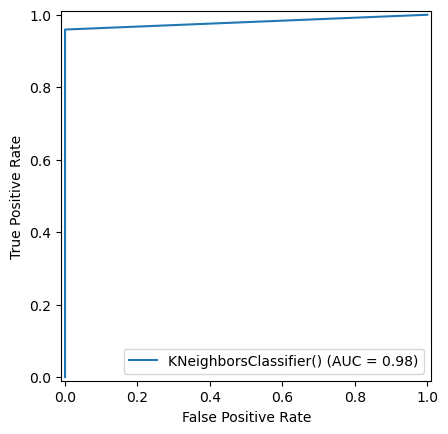

In [118]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred10)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Model)
display.plot()

In [119]:
import pickle

In [120]:
# saving the model
pickle.dump(Model,open('Glass_Class_Prediction.pkl','wb'))

In [121]:
Model1=pickle.load(open('Glass_Class_Prediction.pkl','rb'))            #loading the model

In [122]:
test=Model1.predict(x_test)

In [123]:
final_accuracy= accuracy_score(y_test,test)              #checking accuracy score
final_accuracy

0.978494623655914

# Accuracy is good

In [124]:
test2=Model1.predict(np.array([0.332127,3.945517,-0.689377,-1.612464,-1.319609,-0.023335]).reshape(1,-1))
test2

array([0])